In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

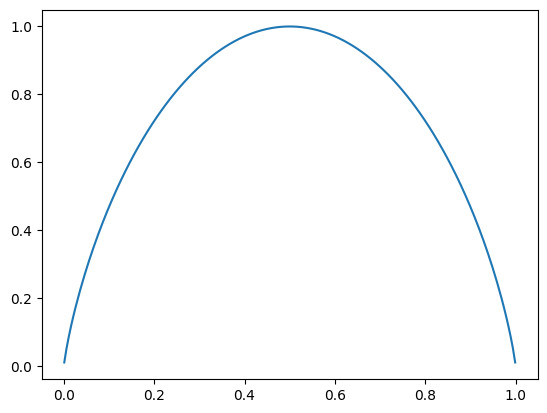

In [15]:
plot_x = np.linspace(0.001, 0.999, 200) # 反映熵值和概率的关系
plt.plot(plot_x, entropy(plot_x))
plt.show()

In [16]:
iris = load_iris()
x = iris.data
y = iris.target
x[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

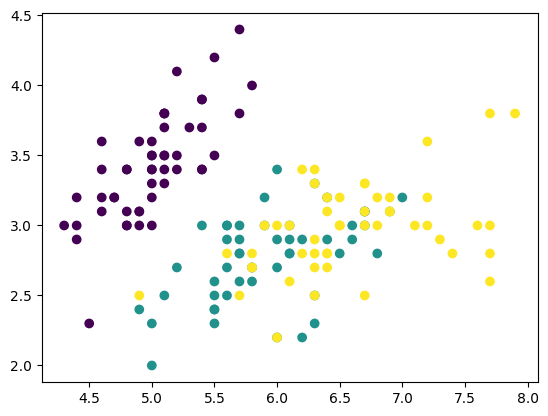

In [17]:
plt.scatter(x[:,0], x[:,1],c=y)

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(x,y)

,criterion,'entropy'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]')]

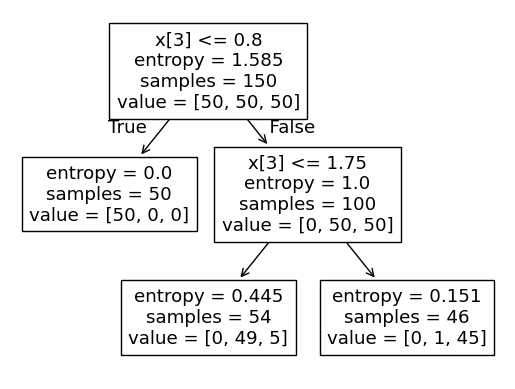

In [19]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [20]:
from collections import Counter
Counter(y)

Counter({np.int64(0): 50, np.int64(1): 50, np.int64(2): 50})

In [9]:
# def calc_entropy(p):
#     counter = Counter(y)
#     sum_ent = 0
#     for i in counter:
#         p = counter[i] / len(y)
#         sum_ent += (-p*np.log2(p))
#         # print(f"i: {i}")
#     return sum_ent

def calc_entropy(y):
    counter = Counter(y)
    sum_ent = 0
    for i in counter:
        p = counter[i] / len(y)
        sum_ent += (-p * np.log2(p))
    return sum_ent

calc_entropy(Counter(y))

np.float64(-202.94468445267842)

In [10]:
# def split_dataset(x,y,dim,value):
#     index_left = (x[:, dim] <= value) #创建 mask 数组
#     index_right = (x[:, dim] > value)
#     # print(f"index_right: {index_right}")
#     return x[index_left], y[index_left], x[index_right], y[index_right] # 返回子数组

def split_dataset(x, y, dim, value):
    index_left = (x[:, dim] <= value)
    index_right = (x[:, dim] > value)
    return x[index_left], y[index_left], x[index_right], y[index_right]


In [11]:
def find_best_split(x, y):
    best_value = -1
    best_entropy = np.inf
    best_l_entropy, best_r_entropy = None, None
    best_dim = -1
    for dim in range(x.shape[1]):
        sorted_index = np.argsort(x[:,dim])
        for i in range(x.shape[0]-1):
            l_value = x[sorted_index[i],dim]
            r_value = x[sorted_index[i+1],dim]
            if l_value != r_value:
                value = (l_value+r_value)/2
                x_left, y_left, x_right, y_right = split_dataset(x, y, dim, value)
                l_entropy = calc_entropy(y_left)
                r_entropy = calc_entropy(y_right)
                entropy = (len(x_left)*l_entropy + len(x_right)*r_entropy)/x.shape[0] # 求平均熵
                if entropy < best_entropy:
                    best_entropy = entropy
                    best_l_entropy = l_entropy
                    best_r_entropy = r_entropy
                    best_dim = dim
                    best_value = value
    return best_dim, best_value, best_l_entropy, best_r_entropy, best_entropy

In [12]:
find_best_split(x, y)

(2,
 np.float64(2.45),
 np.float64(0.0),
 np.float64(1.0),
 np.float64(0.6666666666666666))